<h1> Plotly Practice with Commodity Data </h1>
I wasn't quite sure what to do with the data, but I had a good time looking at it anyway. Commodities are not something that I've learned much about, as I'm more familiar with stocks. 

I'm assuming that a few factors like like the following will have a huge impact on commodities. 
- increased economic activity 
- understanding weather patterns 
- inflation

***

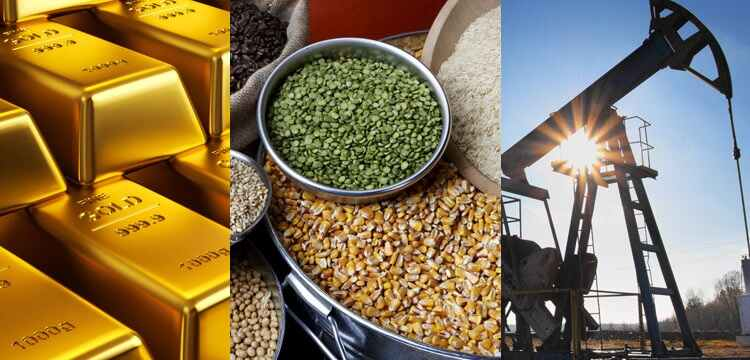

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data_dir = '/kaggle/input/commodity-futures-price-history/Commodity Data/'

In [ ]:
sugar = pd.read_csv(data_dir + 'Sugar.csv')
nat_gas = pd.read_csv(data_dir + 'Natural Gas.csv')
soy_meal = pd.read_csv(data_dir + 'Soybean Meal.csv')
soybean = pd.read_csv(data_dir + 'Soybean.csv')
soy_oil = pd.read_csv(data_dir + 'Soybean Oil.csv')

<h1> Basic Info </h1>
We'll start with simple Pandas functions head, info, and describe to get an idea about Sugar. 

In [ ]:
sugar.head()

In [ ]:
sugar.info()

In [ ]:
sugar.describe()

<h2> Simple plot of sugar. </h2>
We want to change it a bit though, it's difficult to read with that date format. 

In [ ]:
sugar.plot(x='Date', y='Close')

In [ ]:
import datetime

# changing the date to datetime format
sugar['Date'] = pd.to_datetime(sugar['Date'])
sugar.plot(x='Date', y='Close')

<h2> You can notice the ease in readability by changing the date to datetime format </h2>

<h1> Let's look at Natural Gas </h1>

<h3> Just a few lines of code with Plotly will give you a nice graph for you to zoom in on and identify ups and downs </h3>
I didn't fill any of the NaN values, but will do that later with backfill. There's no reason for it here, but I would like to know where that data got to. 

In [ ]:
import plotly.express as px


fig = px.line(nat_gas, x='Date', y='Adj Close', 
             hover_data={'Date'}, 
             title='Natural Gas Data')

fig.show()

<h2> A more detailed graph with a few more lines of code if you want annotations <h2>

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=nat_gas['Date'], 
                                    open=nat_gas['Open'], 
                                    high=nat_gas['High'],
                                    low=nat_gas['Low'],
                                    close=nat_gas['Close'])])

fig.update_layout(
    title='Natural Gas Prices', 
    yaxis_title='Price ($)', 
shapes = [dict(x0='2014-02-1', x1='2016-04-01', y0=0, y1=1, xref='x', yref='paper', 
              line_width=2)], 
annotations=[dict(x='2014-02-01', y=0.3, xref='x', yref='paper', 
                 showarrow=True, xanchor='left', text='A downward trend here')])

fig.show()

<h1> Moving on to Soy Products </h1>

I wanted to look at the Soy Products to see what kind of similarities/differences they have. 
    
<h4> Let's iterate over all three dataframes to make add a column called <code> Percent Change </code>. This will let us compare the soy products on a percentage gain and loss instead of total price. </h4>

In [ ]:
for row in soybean.iterrows():
    soybean['Percent Change'] = (soybean["Open"] / 491)
    
for row in soy_oil.iterrows():
    soy_oil['Percent Change'] = (soy_oil["Open"] / 17.0499)

for row in soy_meal.iterrows():
    soy_meal['Percent Change'] = (soy_meal["Open"] / 185.8)

In [ ]:
soybean.head(3)

In [ ]:
soy_oil.head(3)

In [ ]:
soy_meal.head(3)

<h2> <code> soy_oil </code> is the starting line for the comparison. It's the oldest! </h2>

Let's drop and rename some columns. Then we'll join the soy products together in <code> soy_prod </code>

In [ ]:
# this is for the Apples to Apples Comparison
# drop all the unneccesary columns, and rename the Percent change... why? I'm not sure

soybean.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], inplace=True)
soybean.rename(columns={'Percent Change': 'Soy Per. Ch.'}, inplace=True)
soy_oil.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], inplace=True)
soy_oil.rename(columns={'Percent Change': 'Soy Oil Per. Ch.'}, inplace=True)
soy_meal.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], inplace=True)
soy_meal.rename(columns={'Percent Change': 'Soy Meal Per. Ch.'}, inplace=True)


# when you join them together, make sure the dates are in order (oil-March, meal-May, soybean-Sep)
soy_prod = soy_oil.set_index('Date').join(soy_meal.set_index('Date').join(soybean.set_index('Date')))
soy_prod.reset_index(inplace=True)

In [ ]:
soy_prod.isna().sum()

In [ ]:
# backward fill to start at 1.000 across the board
soy_prod = soy_prod.bfill(axis='rows')

In [ ]:
soy_prod.isna().sum()

In [ ]:
fig = px.line(soy_prod, x='Date', y=soy_prod.columns, 
             hover_data={'Date'}, 
             title='Comparison of Soy Product Prices')

fig.show()

<h2> They tend to follow each other </h2>
That make sense! They're all soy products. Sometimes they don't though. 

In [ ]:
fig = px.line(soy_prod, x='Date', y=soy_prod.columns, 
             hover_data={'Date'}, 
             title='Soy Meal Goes from Last to First')

fig.update_layout(xaxis_range=[datetime.datetime(2012, 5, 1), 
                              datetime.datetime(2014, 9, 1)])
fig.show()

Why does Soy Meal jump all the way ahead of both Soy Oil and Soybean? More details are needed here, and an extended analysis would be important. 

<h1> Plotly's Range Selector </h1>

I chose three different commodities to look at, just to see what may come of it. I'm expecting nothing, but let's find out. 

In [ ]:
cattle = pd.read_csv(data_dir + 'Feeder Cattle.csv')
gas = pd.read_csv(data_dir + 'RBOB Gasoline.csv')
coffee = pd.read_csv(data_dir + 'Coffee.csv')

In [ ]:
print("coffee:", coffee.head(1))
print("gas", gas.head(1))
print("cattle", cattle.head(1))

Drop, rename, join, and backfill **Coffee**, **Gas**, and **Cattle**. 

In [ ]:
# add a percent change row to each
for row in cattle.iterrows():
    cattle['Percent Change'] = (cattle["Open"] / 81.5)   
for row in coffee.iterrows():
    coffee['Percent Change'] = (coffee["Open"] / 124)
for row in gas.iterrows():
    gas['Percent Change'] = (gas["Open"] / 0.889)

# drop unnecessary info     
cattle.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], inplace=True)
cattle.rename(columns={'Percent Change': 'Cattle Per. Ch.'}, inplace=True)
gas.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], inplace=True)
gas.rename(columns={'Percent Change': 'Gas Per. Ch.'}, inplace=True)
coffee.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], inplace=True)
coffee.rename(columns={'Percent Change': 'Coffee Per. Ch.'}, inplace=True)

In [ ]:
# when you join them together, make sure the dates are in order - coffee -> gas -> cattle
three = coffee.set_index('Date').join(gas.set_index('Date').join(cattle.set_index('Date')))
three.reset_index(inplace=True)

#backfill to make sure it's all good
three = three.bfill(axis='rows')

In [ ]:
three.isna().sum()

In [ ]:
fig = px.line(three, x='Date', y=three.columns, 
             title='Three Commodities -> with Range Selector')
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])))

fig.show()

<h2> Scatterplot Matrix </h2>

And just for some extra fun, let's take a look at gold and how open, close, and volume can all relate to each other. 

In [ ]:
gold = pd.read_csv(data_dir + 'Gold.csv')
gold.head()

In [ ]:
import plotly.figure_factory as ff
import plotly.offline as py

fig = ff.create_scatterplotmatrix(gold[["Open", "Close", "Volume"]], 
                                  diag='box',
                                  height=700, 
                                  width=700,
                                  size=3,
                                  colormap='RdBu')
py.iplot(fig)

<h1> And that's it! </h1>

This was just an intro to some of the fun things you can do with plotly. It's a very powerful tool, especially in the financial sector. 

<h2> Cheers! </h2>